In [1]:
import dkist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cv2
import dask
import dask.array as da
from sun_blinker import ImageBlinker
import sys
sys.path.append("/cluster/home/zhuyin/scripts/destretch/")
from destretch import destretchSeq
from IPython.display import Video
import h5py
from astropy.visualization import ImageNormalize, AsinhStretch

In [2]:
# from Dato Kuridze
def storeSequence(data, movieName, dpi=300, write=True, fps=30):
  fig =plt.figure()
  im = plt.imshow(data[0,:,:], cmap='gray', interpolation='nearest', origin="lower",
                  norm=ImageNormalize(vmin=np.nanpercentile(data[0,:,:], 0.5),
                                      vmax=np.nanpercentile(data[0,:,:], 99.5)))
  fig.tight_layout()


  def animate(n):
    im.set_data(data[n,:,:])
    return im

  ani = animation.FuncAnimation(fig, animate, frames=data.shape[0], interval=100)
  
  if write:
    writer = animation.writers['ffmpeg'](fps=fps)
    ani.save(movieName, writer=writer, dpi=dpi)
  plt.close(fig)  

In [3]:
vbi_hbeta_dir = '/cluster/scratch/zhuyin/pid_1_123/BLZNL/'
vbi_hbeta_dataset = dkist.load_dataset(vbi_hbeta_dir)

In [4]:
vbi_data_crop = vbi_hbeta_dataset.data[:,:,:]

In [5]:
vbi_data_crop

dask.array<reshape, shape=(433, 4096, 4096), dtype=float32, chunksize=(1, 4096, 4096), chunktype=numpy.ndarray>

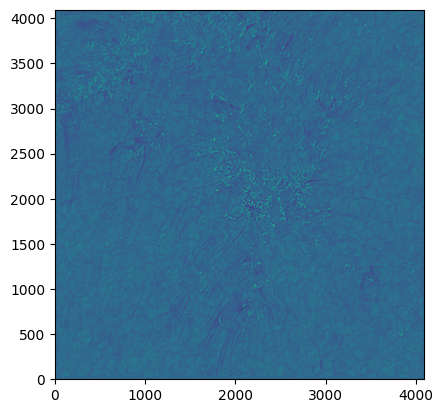

In [6]:
plt.imshow(vbi_data_crop[0,:,::-1],origin="lower")

In [7]:
storeSequence(vbi_data_crop[:,:,::-1].compute(), "../sav/BLZNL_raw.mp4")

In [8]:
vbi_data_crop_compute = vbi_data_crop[:,:,::-1].compute()

In [9]:
vbi_data_crop_destretch = destretchSeq(vbi_data_crop_compute, [128, 96], rMean=3, globalTrack = [1500,1500,256])

In [9]:
storeSequence(vbi_data_crop_destretch, "../sav/BLZNL_destretch.mp4")

In [ ]:
with h5py.File("/cluster/home/zhuyin/scratch/pid_1_123/BLZNL_aligned/BLZNL_aligned_all.h5","w") as hf:
    hf.create_dataset('vbi_img', data=vbi_data_crop_destretch)